# Pymaceuticals Inc.
---
### Analysis
**Background:**

Using the provided 'Mouse_metadata.csv' and 'Study_results.csv', the data was merged, cleaned, organized, compared and plotted, in order to compare the tested performance of the new skin cancer medication Capomulin against other drugs.

**Data Summary:**

The aggregated dataset represents the testing of 248 mice infected with squamos cell carcinoma (SSC), (1 Mouse ID, was dropped from the study, due to it being duplicated with different testing records). The testing group of mice was compromised of a nearly 50% split between male and female, with ages ranging anywhere from 1 to 24 months. Each of these mice was treated with a regimen of one of 10 drugs (1 being the new drug Capomulin) or a Placebo. Tumor volume (mm3) was tracked regularly from 0 to as long as 45 days. At the end of the study, Capomulin performed well against most of the existing drugs and placebo, matched only by the drug Ramicane.

**Observations:**

When looking at the Summary Statistics we see that Capomulin was one of two drugs in the study which showed a final average Tumor Volume of a little over 40 mm3, compared to the remaining drugs and placebo being in the low 50s mm3. Additionally, the variance, standard deviation and standard error further support the strength of the data. The same can be said for the closest performing drug Ramicane.

A review of the box and whisker plots of both Capomulin and Ramicane shows Capomulin to have a narrower interquartile range, but the median is slightly negatively skewed when compared to the more normally distrubuted Ramicane. Meaning overall, the Ramicane test subjects generally saw a lower tumor volume at the end of the study, but not by a statistically significant amount.

A brief note, both Capomulin and Ramicane had the most number of datapoints (timepoint and volume measurements) compared to the other drugs being tested, (although similar to eachother). It is not immediately clear if this is due to there being more subjects tested with these two drugs. It is also possible there is a correlation the subjects on other drugs may not have lived and the datapoints ended prematurely.

Reviewing the linear plot of Capomulin, Timpoint vs Tumor Volume (mm3), the size of the tumor does show a general downwards trend. The plot shows an intial period of continued growth (possibly while the drug reached effective dosing levels), followed by periods of large volume loss, with short periods of slight regrowth. This could possibly be due to the interval between the adminstration of the drug and the period of its effectiveness right after administration.

Lastly, there was strong, positive correlation between the mouse subjects weight and the size of the tumor. It would be important to determine the distribution of mouse weight across the various regimens being tested to insure no incorrect causation is inferred in the results.

**Conclusion:**

The new drug Capomulin compared well against other existing drugs and Placebo, with only Ramicane performing just as well.

While the data is strong, and is supported by the summary statistics, further analysis should be performed to verify whether the strong, positive correlation between mouse weight and tumor volume had an effect on the outcome of the data. For instance, were there more smaller weight mice on both the Capomulin and Ramicane test groups, thereby skewing the tumor volumes downward. Or is it possible the drug was not affecting the size of the tumor directly, but rather the weight of the mouse subject and thereby reducing the size of the tumor versely compared to the mass of the mouse.

Lastly, I would want more time data points specifically observing the reduction in tumor volume for the preiod immediately after adminstration of the drug, and at closer intervals afterward to see when the effectiveness wanes. This data could provide an optimized scheduling of administration in order to maintain effectiveness and smooth the downward trend of the tumor volume, and minimize regrowth.


In [212]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [213]:
# Checking the number of mice.
combined_data_df["Mouse ID"].nunique()


249

In [214]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# meaning there should be no doubles of a combined 'Mouse ID' and "Timepoint"

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated = combined_data_df[combined_data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicated["Mouse ID"].unique()


array(['g989'], dtype=object)

In [215]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data_df = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989", :]
duplicated_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [216]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df.drop(combined_data_df[combined_data_df["Mouse ID"] == "g989"].index)
clean_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [217]:
# Checking the number of mice in the clean DataFrame.
clean_data_df["Mouse ID"].nunique()


248

## Summary Statistics

In [218]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Mean Tumor Volume
mean_tumor_volume = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

# Median Tumor Volume
median_tumor_volume = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# Tumor Volume Variance
var_tumor_volume = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

# Tumor Volume Std. Dev.
std_tumor_volume = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Tumor Volume Std. Err.
sem_tumor_volume = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem_tumor_volume

#Create DataFrame of data
summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": var_tumor_volume,
    "Tumor Volume Std. Dev.": std_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [219]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_data_df = clean_data_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_data_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

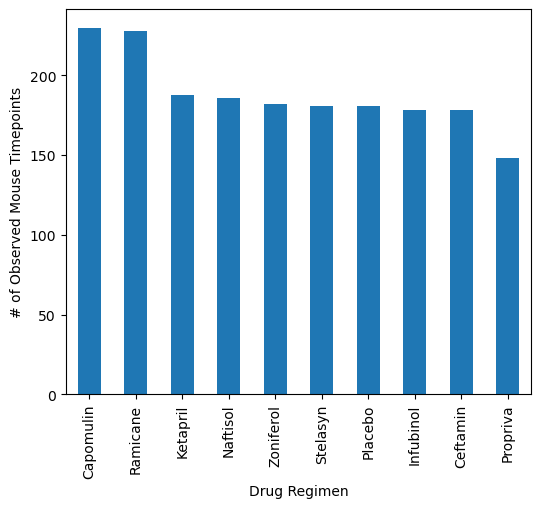

In [239]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Filter cleaned data down to a df of Drug Regimen and row counts
pd_bar_plot_df = pd.DataFrame(clean_data_df["Drug Regimen"].value_counts())
pd_bar_plot_df

# Use DataFrame.plot() to create bar chart from data
pd_bar_plot_df.plot(kind="bar", figsize=(6, 5), xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", legend=None)



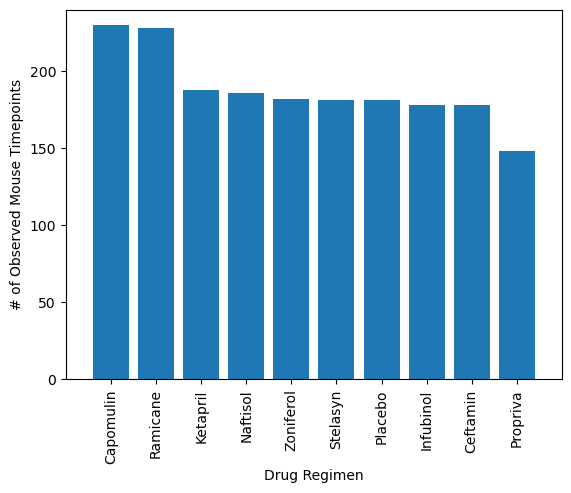

In [221]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# set x axis and tick locations
x_axis = np.arange(len(pd_bar_plot_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, pd_bar_plot_df["Drug Regimen"], align="center")
plt.xticks(tick_locations, pd_bar_plot_df.index, rotation="vertical")
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(pd_bar_plot_df["Drug Regimen"])+10)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



array([<Axes: ylabel='Sex'>], dtype=object)

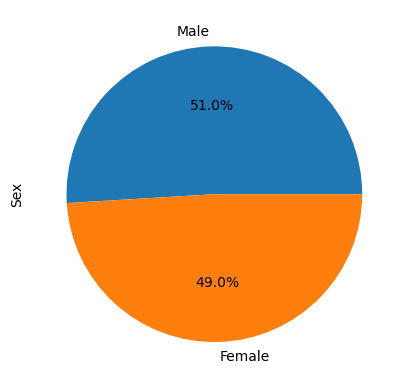

In [241]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# create new DataFrame from clean_data_df (sexes as index and counts of each)
male_female = pd.DataFrame(clean_data_df["Sex"].value_counts())

# plot pandas pie chart
male_female.plot(kind="pie", subplots=True, use_index=True, ylabel=("Sex"), autopct="%1.1f%%", legend=None)

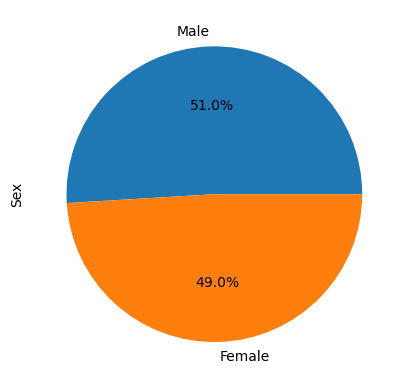

In [223]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# create list of labels using values in cleaned_data_df
# reverse order for proper alignment with data
sexes = list(clean_data_df["Sex"].unique())
sexes.sort(reverse=True)
# starter data has no exploded pies
explode = (0, 0)

# Plot pie chart
plt.pie(male_female["Sex"], labels=sexes, autopct="%1.1f%%", startangle=0)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [236]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by creating a grouped by Mouse ID
grouped_tp_df = clean_data_df.groupby("Mouse ID")
# retrieve the last (maximum) timepoint for each mouse and make a DataFrame
grouped_tp_df = pd.DataFrame(grouped_tp_df["Timepoint"].max())
# reset the index
grouped_tp_df = grouped_tp_df.reset_index()


# Merge this group df with the original cleaned DataFrame to get the tumor volume at the last timepoint
final_vol_tumor = pd.merge(grouped_tp_df, clean_data_df, how="left")
final_vol_tumor


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [237]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tum_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    temp_list = final_vol_tumor.loc[final_vol_tumor["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset
    tum_vol_data.append(temp_list)
    
# Determine outliers using upper and lower bounds
# create an enumerated for loop on 'tum_vol_data'
for index, drug in enumerate(tum_vol_data):
    # calculate quartiles, iqr, upper and lower bounds
    quartiles = drug.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # per the Rubric (not the Jupyter Notebook instructions) disply the IQR
    print(f"The {treatments[index]} Tumor Volume IQR is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # create a temp list of possible outliers
    temp_fliers = final_vol_tumor.loc[(final_vol_tumor["Drug Regimen"] == treatments[index]) & (
        (final_vol_tumor["Tumor Volume (mm3)"] < lower_bound) | (final_vol_tumor["Tumor Volume (mm3)"] > upper_bound)), "Tumor Volume (mm3)"]

    # print results of drug name and any possible outliers: index and tumor volume
    print(f"{treatments[index]} potential outliers: {temp_fliers}")
    print()


The Capomulin Tumor Volume IQR is: 7.781863460000004
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

The Ramicane Tumor Volume IQR is: 9.098536719999998
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

The Infubinol Tumor Volume IQR is: 11.477135160000003
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

The Ceftamin Tumor Volume IQR is: 15.577752179999997
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



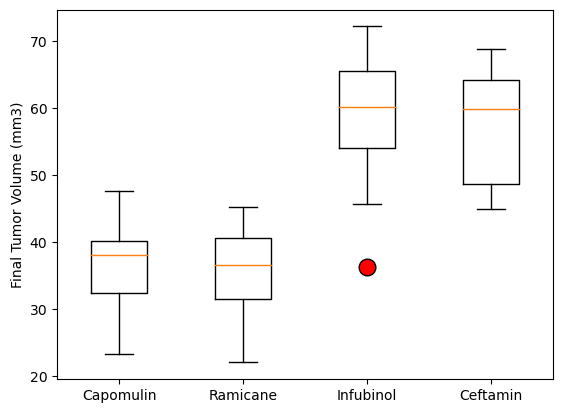

In [163]:
# Generate a box plot which shows the distrubution of the tumor volume for each treatment group.
subsets = [final_vol_tumor.loc[final_vol_tumor["Drug Regimen"] == drug, "Tumor Volume (mm3)"] for drug in treatments]

x_axis = np.arange(0, len(treatments))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

fig, drugs = plt.subplots()
drugs.boxplot(subsets, flierprops={"marker": "o", "markersize": 12, "markerfacecolor": "red", "markeredgecolor": "black"})
drugs.set_ylabel("Final Tumor Volume (mm3)")
drugs.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

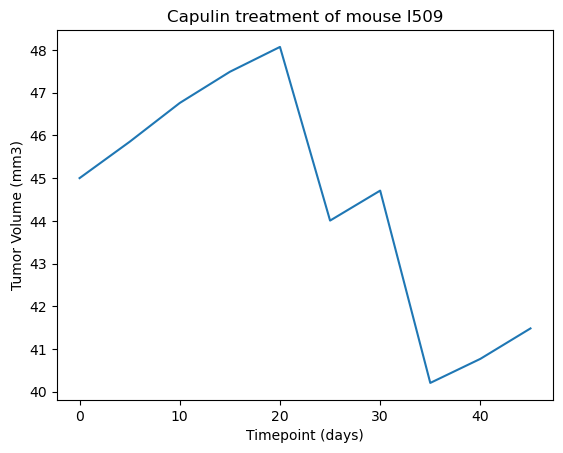

In [72]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# create DataFrame of only mouse l509 data
mouse_data = clean_data_df.loc[clean_data_df["Mouse ID"] == "l509", ["Timepoint", "Tumor Volume (mm3)"]]


# define x_axis and tick locations
x_axis = np.arange(0, mouse_data["Timepoint"].count())
tick_locations = []
for x in x_axis:
    if x % 2 == 0:
        tick_locations.append(x)

# create a list of tick labels
tick_labels = list(mouse_data.loc[mouse_data["Timepoint"] % 10 == 0, "Timepoint"].unique())

# plot figure of mouse_1509 timepoint vs tumor volume data
mouse_1509, = plt.plot(x_axis, mouse_data["Tumor Volume (mm3)"])

plt.title("Capulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(tick_locations, tick_labels)

plt.show()


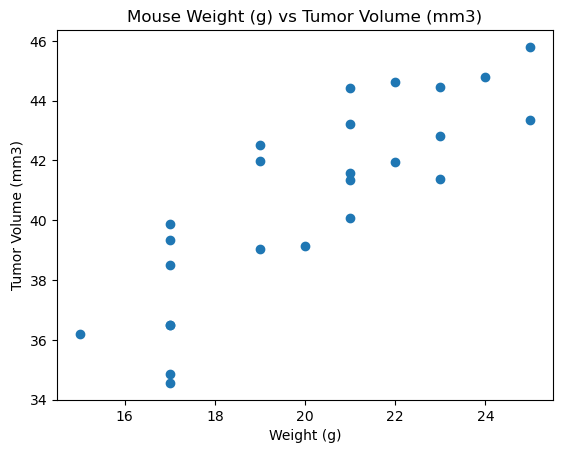

In [242]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# create smaller data set of just the Capomulin data
capomulin_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin", ]
capomulin_df

# create df of mouse weights
# pare down large df
mouse_weight = pd.DataFrame(capomulin_df[["Mouse ID", "Weight (g)"]])
# drop_duplicate mouse ids, adn sort the values to align with groupby data
mouse_weight = mouse_weight.drop_duplicates(["Mouse ID"])
mouse_weight = mouse_weight.sort_values(by="Mouse ID")

# set the index to Mouse ID
mouse_weight = mouse_weight.set_index("Mouse ID")
mouse_weight

# group capomulin data by mouse id and find mean of tumor volumes for each mouse
grouped_tum_vol = capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
grouped_tum_vol

# create a new df with mouse weight and tumor average data
weight_vs_tumor = pd.DataFrame({
    "weight": mouse_weight["Weight (g)"],
    "avg_tum_vol": grouped_tum_vol
})
weight_vs_tumor.head()


# plot figure of weights versus average tumor volumes
fig, capo = plt.subplots()

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight (g) vs Tumor Volume (mm3)")

capo.scatter(weight_vs_tumor["weight"], weight_vs_tumor["avg_tum_vol"], marker="o")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor is 0.84


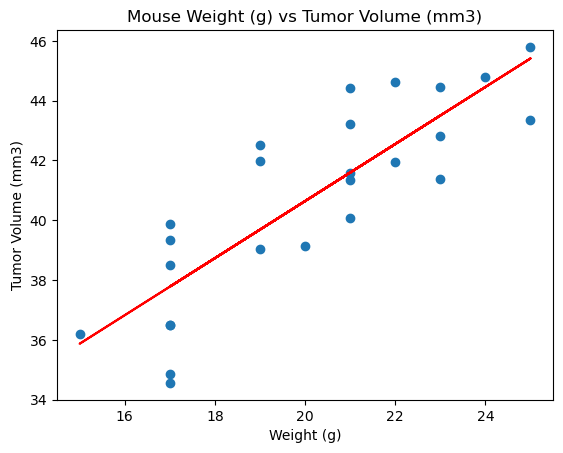

In [243]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = weight_vs_tumor['weight']
y_values = weight_vs_tumor['avg_tum_vol']

# Calculate Correlation Coefficient
print(f"The correlation between mouse weight and the average tumor is {round(st.pearsonr(x_values, y_values)[0],2)}")

# calculate linear regression data
(slope, y_int, r_value, p_value, std_err) = st.linregress(x_values, y_values)
regress_values = x_values * slope + y_int

# replot previous scatter plot with regression line
# plot figure of weights versus average tumor volumes
fig, capo_2 = plt.subplots()

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight (g) vs Tumor Volume (mm3)")

capo_2.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, color="red")
plt.show()
